In [98]:
# This tutorial is to design and test a CNN on MNIST dataset

In [99]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [100]:
torch.manual_seed(1) 

In [101]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 32
LR = 0.001              # learning rate
DOWNLOAD_MNIST = False

In [102]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


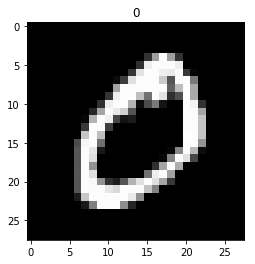

In [103]:
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[1].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[1])
plt.show()

In [104]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [105]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

In [106]:
class NeuralNet(nn.Module):
    def __init__(self, num_classes):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Sequential(
                                      nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2)
                                  )
        self.conv2 = nn.Sequential(
                                      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2)
                                  )
        self.out = nn.Linear(32 * 7 * 7, num_classes)
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x
        

In [107]:
net = NeuralNet(num_classes=10)
print(net)

NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [108]:
optimizer =torch.optim.Adam(params=net.parameters(), lr=LR)
loss_fn = torch.nn.CrossEntropyLoss()

In [110]:
for e in range(EPOCH):
    for step, (x, y) in enumerate(train_loader): 
        x_var = Variable(x)
        y_var = Variable(y)
        y_pred = net(x_var)
        loss = loss_fn(y_pred, y_var)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #if e % 10 == 0:
    test_op = net(test_x)
    predictions = torch.max(test_op, 1)[1].data.squeeze()
    accuracy = (predictions == test_y).sum().item() / float(test_y.size(0))
    print("epoch: " + str(e) + " Test Accuracy: " + str(accuracy))
    

epoch: 0 Test Accuracy: 0.986


In [116]:
# Print few outputs from the test dataset
print("Test Outputs")
print(test_y[:10])
print("Predicted Outputs")
test_op = net(test_x[:10])
predictions = torch.max(test_op, 1)[1].data.squeeze()
print(predictions)

Test Outputs
tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9])
Predicted Outputs
tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9])
